<a href="https://colab.research.google.com/github/Varstzeiin/Project-2-Rekomendasi-Kopi/blob/main/ASTORIA_AssociationAnalystModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [ ]:
pip install --upgrade mlxtend

In [ ]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.4


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **DATA PREPARATION**

## Import Data

In [ ]:
# Load the dataset
file_path = '/content/dataset astoria.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

df.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_datetime,invoice_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,2023-01-01 11:01:48,AST6716,1,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,11
1,2023-01-01 11:01:58,AST6716,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte,3.75,1,Jan,7,Sun,11
2,2023-01-01 11:28:29,AST5956,2,3,Astoria,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,7.00,1,Jan,7,Sun,11
3,2023-01-01 11:43:57,AST4221,2,3,Astoria,25,2.20,Coffee,Organic brewed coffee,Brazilian Sm,4.40,1,Jan,7,Sun,11
4,2023-01-01 11:47:13,AST4221,1,3,Astoria,30,3.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,3.00,1,Jan,7,Sun,11
5,2023-01-01 11:50:16,AST4221,2,3,Astoria,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg,6.00,1,Jan,7,Sun,11
6,2023-01-01 11:50:23,AST4221,2,3,Astoria,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,7.50,1,Jan,7,Sun,11
7,2023-01-01 11:57:17,AST8841,2,3,Astoria,37,3.00,Coffee,Barista Espresso,Espresso shot,6.00,1,Jan,7,Sun,11
8,2023-01-01 12:01:20,AST8841,2,3,Astoria,35,3.10,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,6.20,1,Jan,7,Sun,12
9,2023-01-01 12:09:11,AST8841,2,3,Astoria,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,1,Jan,7,Sun,12


## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20025 entries, 0 to 20024
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_datetime  20025 non-null  datetime64[ns]
 1   invoice_id            20025 non-null  object        
 2   transaction_qty       20025 non-null  int64         
 3   store_id              20025 non-null  int64         
 4   store_location        20025 non-null  object        
 5   product_id            20025 non-null  int64         
 6   unit_price            20025 non-null  float64       
 7   product_category      20025 non-null  object        
 8   product_type          20025 non-null  object        
 9   product_detail        20025 non-null  object        
 10  Revenue               20025 non-null  float64       
 11  Month                 20025 non-null  int64         
 12  Month.1               20025 non-null  object        
 13  Weekday         

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_datetime,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,20025,20025.000000,20025.0,20025.000000,20025.000000,20025.000000,20025.000000,20025.000000,20025.000000
mean,2023-04-16 16:30:27.957053696,1.480899,3.0,31.421673,3.024235,4.481613,3.999301,3.974831,12.585768
min,2023-01-01 11:01:48,1.000000,3.0,22.000000,2.000000,2.000000,1.000000,1.000000,7.000000
25%,2023-03-06 17:31:41,1.000000,3.0,26.000000,2.450000,3.000000,3.000000,2.000000,9.000000
50%,2023-04-25 09:40:49,1.000000,3.0,31.000000,3.000000,4.000000,4.000000,4.000000,12.000000
75%,2023-05-30 11:38:59,2.000000,3.0,36.000000,3.750000,6.000000,5.000000,6.000000,16.000000
max,2023-06-30 19:53:46,2.000000,3.0,41.000000,4.250000,8.500000,6.000000,7.000000,19.000000
std,NaN,0.499647,0.0,5.777950,0.687211,1.862439,1.671869,1.988271,3.782826


In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

## Cleaning Data

In [ ]:
# Cleaning data, removing duplicates, and filtering relevant transactions for "Coffee"
df_cleaned = df.drop_duplicates()
coffee_transactions = df_cleaned[df_cleaned['product_category'] == 'Coffee']
coffee_transactions

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_datetime,invoice_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,2023-01-01 11:01:48,AST6716,1,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,11
1,2023-01-01 11:01:58,AST6716,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte,3.75,1,Jan,7,Sun,11
2,2023-01-01 11:28:29,AST5956,2,3,Astoria,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,7.00,1,Jan,7,Sun,11
3,2023-01-01 11:43:57,AST4221,2,3,Astoria,25,2.20,Coffee,Organic brewed coffee,Brazilian Sm,4.40,1,Jan,7,Sun,11
4,2023-01-01 11:47:13,AST4221,1,3,Astoria,30,3.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,3.00,1,Jan,7,Sun,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,2023-06-30 19:35:24,AST4106,2,3,Astoria,41,4.25,Coffee,Barista Espresso,Cappuccino Lg,8.50,6,Jun,5,Fri,19
20021,2023-06-30 19:45:16,AST1278,1,3,Astoria,41,4.25,Coffee,Barista Espresso,Cappuccino Lg,4.25,6,Jun,5,Fri,19
20022,2023-06-30 19:51:59,AST5478,2,3,Astoria,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg,6.00,6,Jun,5,Fri,19
20023,2023-06-30 19:52:28,AST3256,2,3,Astoria,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,4.90,6,Jun,5,Fri,19


In [ ]:
coffee_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20022 entries, 0 to 20024
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_datetime  20022 non-null  datetime64[ns]
 1   invoice_id            20022 non-null  object        
 2   transaction_qty       20022 non-null  int64         
 3   store_id              20022 non-null  int64         
 4   store_location        20022 non-null  object        
 5   product_id            20022 non-null  int64         
 6   unit_price            20022 non-null  float64       
 7   product_category      20022 non-null  object        
 8   product_type          20022 non-null  object        
 9   product_detail        20022 non-null  object        
 10  Revenue               20022 non-null  float64       
 11  Month                 20022 non-null  int64         
 12  Month.1               20022 non-null  object        
 13  Weekday              

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coffee_transactions.to_excel('coffee_transactions.xlsx', index=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **DATA TRANSFORMATION**

In [ ]:
# Transforming data into a basket format
basket = coffee_transactions.groupby(['invoice_id', 'product_detail'])['transaction_qty'].sum().unstack().reset_index().fillna(0)
basket.set_index('invoice_id', inplace=True)

# Convert quantities to binary (1 if purchased, 0 otherwise)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-f1d4bc3e1efa>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,Ethiopia Rg,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm
invoice_id,,,,,,,,,,,,,,,,,,,,
AST1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
AST1001,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
AST1002,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1
AST1003,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
AST1004,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AST9994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AST9995,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
AST9996,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7864 entries, AST1000 to AST9998
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brazilian Lg                 7864 non-null   int64
 1   Brazilian Rg                 7864 non-null   int64
 2   Brazilian Sm                 7864 non-null   int64
 3   Cappuccino                   7864 non-null   int64
 4   Cappuccino Lg                7864 non-null   int64
 5   Columbian Medium Roast Lg    7864 non-null   int64
 6   Columbian Medium Roast Rg    7864 non-null   int64
 7   Columbian Medium Roast Sm    7864 non-null   int64
 8   Espresso shot                7864 non-null   int64
 9   Ethiopia Lg                  7864 non-null   int64
 10  Ethiopia Rg                  7864 non-null   int64
 11  Ethiopia Sm                  7864 non-null   int64
 12  Jamaican Coffee River Lg     7864 non-null   int64
 13  Jamaican Coffee River Rg     7864 non-null  

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-51067e5de2af>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,Ethiopia Rg,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm
invoice_id,,,,,,,,,,,,,,,,,,,,
AST1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
AST1001,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
AST1002,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1
AST1003,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
AST1004,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AST9994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AST9995,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
AST9996,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
basket_sets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58416 entries, 1 to 149455
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brazilian Lg                 58416 non-null  int64
 1   Brazilian Rg                 58416 non-null  int64
 2   Brazilian Sm                 58416 non-null  int64
 3   Cappuccino                   58416 non-null  int64
 4   Cappuccino Lg                58416 non-null  int64
 5   Columbian Medium Roast Lg    58416 non-null  int64
 6   Columbian Medium Roast Rg    58416 non-null  int64
 7   Columbian Medium Roast Sm    58416 non-null  int64
 8   Espresso shot                58416 non-null  int64
 9   Ethiopia Lg                  58416 non-null  int64
 10  Ethiopia Rg                  58416 non-null  int64
 11  Ethiopia Sm                  58416 non-null  int64
 12  Jamaican Coffee River Lg     58416 non-null  int64
 13  Jamaican Coffee River Rg     58416 non-null  int64

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EXPLARATORY DATA ANALYST**

In [ ]:
coffee_transactions['product_detail'].value_counts()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
product_detail,
Columbian Medium Roast Rg,1108
Ethiopia Sm,1081
Our Old Time Diner Blend Sm,1063
Latte,1058
Jamaican Coffee River Lg,1058
Jamaican Coffee River Rg,1035
Brazilian Rg,1032
Our Old Time Diner Blend Lg,1028
Our Old Time Diner Blend Rg,1027


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_detail
Columbian Medium Roast Rg      1108
Ethiopia Sm                    1081
Our Old Time Diner Blend Sm    1063
Latte                          1058
Jamaican Coffee River Lg       1058
Jamaican Coffee River Rg       1035
Brazilian Rg                   1032
Our Old Time Diner Blend Lg    1028
Our Old Time Diner Blend Rg    1027
Columbian Medium Roast Sm      1025
Name: count, dtype: int64


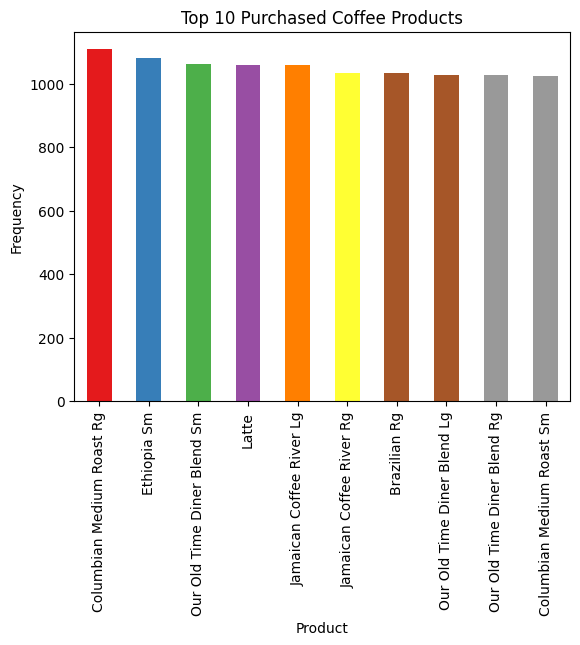

In [ ]:
# Misalkan coffee_transactions adalah DataFrame yang sudah ada
# product_frequency = coffee_transactions['product_detail'].value_counts()
product_frequency = coffee_transactions['product_detail'].value_counts()
print(product_frequency.head(10))

# Mengambil 10 produk teratas
top_products = product_frequency.head(10)

# Membuat palet warna pastel
colors = plt.cm.Set1(np.linspace(0, 1, len(top_products)))

# Plotting
top_products.plot(kind='bar', color=colors, title='Top 10 Purchased Coffee Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# **BUILDING ASSOCIATION RULES**

## Basket

In [ ]:
item_frequencies = coffee_transactions['product_detail'].value_counts(normalize=True)
print(item_frequencies)

product_detail
Columbian Medium Roast Rg      0.055339
Ethiopia Sm                    0.053991
Our Old Time Diner Blend Sm    0.053092
Latte                          0.052842
Jamaican Coffee River Lg       0.052842
Jamaican Coffee River Rg       0.051693
Brazilian Rg                   0.051543
Our Old Time Diner Blend Lg    0.051344
Our Old Time Diner Blend Rg    0.051294
Columbian Medium Roast Sm      0.051194
Latte Rg                       0.049346
Columbian Medium Roast Lg      0.049146
Cappuccino Lg                  0.048846
Brazilian Sm                   0.047847
Ethiopia Rg                    0.047747
Espresso shot                  0.047598
Cappuccino                     0.047448
Brazilian Lg                   0.046249
Jamaican Coffee River Sm       0.045700
Ethiopia Lg                    0.044901
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert basket to boolean format
basket_boolean = basket.astype(bool)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply apriori with minimum support
frequent_itemsets = apriori(basket, min_support=0.04, use_colnames=True)
print(f"Frequent Itemsets Found: {len(frequent_itemsets)}")

Frequent Itemsets Found: 20


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Mengecek apakah frequent_itemsets kosong
if frequent_itemsets.empty:
    print("Frequent itemsets kosong. Kurangi nilai min_support.")
else:
    print(f"Frequent itemsets ditemukan: {frequent_itemsets.shape[0]} itemsets")

Frequent itemsets ditemukan: 20 itemsets


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Menghasilkan aturan asosiasi dengan argumen tambahan yang diperlukan
rules = association_rules(frequent_itemsets,num_itemsets='num_itemsets', metric='lift', min_threshold=0.05)
if rules.empty:
    print("aturan asosiasi ga ditemukan. Coba kau kurangi kurangi dikit nilai min_support atau min_threshold nya.")
else:
    print(rules.head())

aturan asosiasi ga ditemukan. Coba kau kurangi kurangi dikit nilai min_support atau min_threshold nya.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **EVALUATION OF RULES**

In [ ]:
# Sorting rules by lift to identify the best associations
rules = rules.sort_values(by='lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **REAL TIME INPUT & RECOMMENDATION**

In [ ]:
# Real-time input function for recommendations
def recommend_products_interactive(rules, top_n=3):
    while True:
        print("\n--- Coffee Product Recommendation System ---")
        selected_products = input("Enter purchased product(s) separated by commas (or type 'exit' to quit): ").strip()
        if selected_products.lower() == 'exit':
            print("Exiting the system. Have a great day!")
            break
        selected_products = [product.strip() for product in selected_products.split(',')]

        # Generate recommendations
        recommendations = []
        for product in selected_products:
            for _, row in rules.iterrows():
                if product in row['antecedents']:
                    recommendations.extend(list(row['consequents']))
        recommendations = list(set(recommendations) - set(selected_products))  # Exclude already selected

        if recommendations:
            print(f"Recommendations based on your selection: {recommendations[:top_n]}")
        else:
            print("No recommendations found for the selected product(s).")

# Example usage
recommend_products_interactive(rules)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): Brazilian Lg 
No recommendations found for the selected product(s).

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): wxit
No recommendations found for the selected product(s).

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): exit
Exiting the system. Have a great day!
